# Fig 4

Text(0.5, 0.98, 'Quark/Gluon Case Study $M=32$, Coverage on Mixture Fraction $\\kappa$')

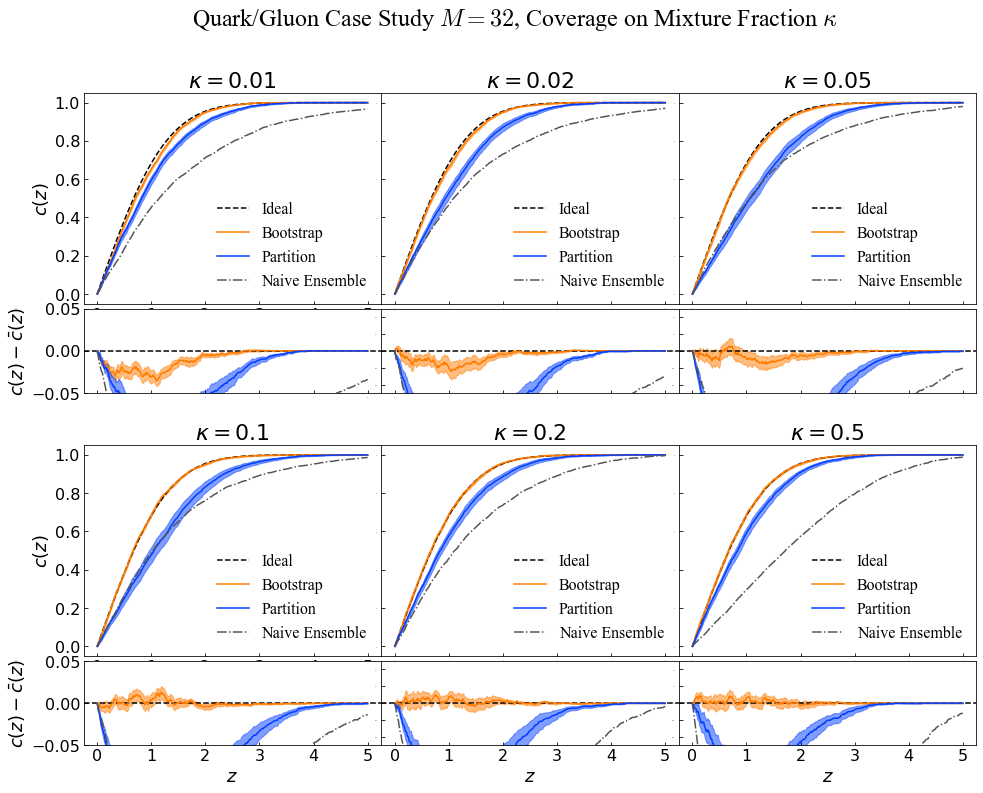

In [ ]:
import torch
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

part_pred = torch.load("YOUR_DIR_HERE/partition_pred_arr.pt")[-1]
part_true = torch.load("YOUR_DIR_HERE/partition_true_arr.pt")[-1]
part_unc = torch.load("YOUR_DIR_HERE/partition_unc_arr.pt")[-1]

strap_pred = torch.load("YOUR_DIR_HERE/bootstrap_pred_arr.pt")[-1]
strap_true = torch.load("YOUR_DIR_HERE/bootstrap_true_arr.pt")[-1]
strap_unc = torch.load("YOUR_DIR_HERE/bootstrap_unc_arr.pt")[-1]

base_pred = torch.load("YOUR_DIR_HERE/baseline_pred_arr.pt")[-1]
base_true = torch.load("YOUR_DIR_HERE/baseline_true_arr.pt")[-1]
base_unc = torch.load("YOUR_DIR_HERE/baseline_unc_arr.pt")[-1]

sigmas = torch.linspace(0,5,500)
part_coverages = ((((part_pred - part_true).abs()/part_unc)).unsqueeze(-1) < sigmas).float().mean(dim=2)
strap_coverages = ((((strap_pred - strap_true).abs()/strap_unc)).unsqueeze(-1) < sigmas).float().mean(dim=2)
baseline_coverages = ((((base_pred - base_true).abs()/base_unc)).unsqueeze(-1) < sigmas).float().mean(dim=2)

ideal_coverages = norm.cdf(sigmas) - norm.cdf(-sigmas)
num_subnet_arr = [2, 4, 8, 16]
f_arr = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
coverages = torch.stack([part_coverages[:4], strap_coverages[:4], baseline_coverages[:4]], dim=-1)[-1,:,:]
num_trainings = coverages.shape[0]
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(5, 3, height_ratios=[2.5, 1, 0.5, 2.5, 1], hspace=0.04, wspace=0)

axs = np.array([
    [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[0, 2])],
    [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[1, 2])],
    [None, None, None],  # This row is an empty space
    [fig.add_subplot(gs[3, 0]), fig.add_subplot(gs[3, 1]), fig.add_subplot(gs[3, 2])],
    [fig.add_subplot(gs[4, 0]), fig.add_subplot(gs[4, 1]), fig.add_subplot(gs[4, 2])],
])
axs[0,0].tick_params(axis='both', which='major', direction='in', labelsize=16)
axs[0,1].tick_params(axis='both', which='major', direction='in', labelsize=0)
axs[0,2].tick_params(axis='both', which='major', direction='in', labelsize=0)
axs[1,0].tick_params(axis='both', which='major', direction='in', labelsize=16)
axs[1,0].tick_params(axis='x', which='major', direction='in', labelsize=0)
axs[1,1].tick_params(axis='both', which='major', direction='in', labelsize=0)
axs[1,2].tick_params(axis='both', which='major', direction='in', labelsize=0)
axs[3,0].tick_params(axis='both', which='major', direction='in', labelsize=16)
axs[3,1].tick_params(axis='both', which='major', direction='in', labelsize=0)
axs[3,2].tick_params(axis='both', which='major', direction='in', labelsize=0)
axs[4,0].tick_params(axis='both', which='major', direction='in', labelsize=16)
axs[4,1].tick_params(axis='y', which='major', direction='in', labelsize=0)
axs[4,1].tick_params(axis='x', which='major', direction='in', labelsize=16)
axs[4,2].tick_params(axis='y', which='major', direction='in', labelsize=0)
axs[4,2].tick_params(axis='x', which='major', direction='in', labelsize=16)

method_names = ['Partition', 'Bootstrap', 'Naive Ensemble']
mpl.rc('font',family='Times New Roman')
mpl.rc('mathtext', fontset='cm')
colors = [sns.color_palette("bright")[0], sns.color_palette("bright")[1], "#555555"]
linestyles = ['-', '-', '-.']

axs[0,0].set_title(r"$\kappa=0.01$", fontsize=22)
axs[0,0].plot(sigmas, ideal_coverages, 'k--', label='Ideal')
axs[1,0].axhline(y=0, color='k', linestyle='--')
axs[1,0].set_ylabel(r"$c(z) - \bar{c}(z)$", fontsize=18)
axs[1,0].set_ylim(-0.05, 0.05)
axs[0,0].set_ylabel(r'$c(z)$',fontsize=18)

axs[0,1].set_title(r"$\kappa=0.02$", fontsize=22)
axs[0,1].plot(sigmas, ideal_coverages, 'k--', label='Ideal')
axs[1,1].axhline(y=0, color='k', linestyle='--')
axs[1,1].set_ylim(-0.05, 0.05)

axs[0,2].set_title(r"$\kappa=0.05$", fontsize=22)
axs[0,2].plot(sigmas, ideal_coverages, 'k--', label='Ideal')
axs[1,2].axhline(y=0, color='k', linestyle='--')
axs[1,2].set_ylim(-0.05, 0.05)

axs[3,0].set_title(r"$\kappa=0.1$", fontsize=22)
axs[3,0].plot(sigmas, ideal_coverages, 'k--', label='Ideal')
axs[4,0].axhline(y=0, color='k', linestyle='--')
axs[4,0].set_xlabel(f'$z$', fontsize=18)
axs[4,0].set_ylabel(r"$c(z) - \bar{c}(z)$", fontsize=18)
axs[4,0].set_ylim(-0.05, 0.05)
axs[3,0].set_ylabel(r'$c(z)$',fontsize=18)

axs[3,1].set_title(r"$\kappa=0.2$", fontsize=22)
axs[3,1].plot(sigmas, ideal_coverages, 'k--', label='Ideal')
axs[4,1].axhline(y=0, color='k', linestyle='--')
axs[4,1].set_xlabel(f'$z$', fontsize=18)
axs[4,1].set_ylim(-0.05, 0.05)

axs[3,2].set_title(r"$\kappa=0.5$", fontsize=22)
axs[3,2].plot(sigmas, ideal_coverages, 'k--', label='Ideal')
axs[4,2].axhline(y=0, color='k', linestyle='--')
axs[4,2].set_xlabel(f'$z$', fontsize=18)
axs[4,2].set_ylim(-0.05, 0.05)

for method_idx_swap in range(3):
    if method_idx_swap == 0:
        method_idx = 1
    elif method_idx_swap == 1:
        method_idx = 0
    elif method_idx_swap == 2:
        method_idx = 2
    for f_idx, f in enumerate(f_arr):
        if f_idx == 0:
            axs[0,0].plot(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[0,0].fill_between(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, coverages[:,f_idx,:,method_idx].mean(axis=0) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
            axs[1,0].plot(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[1,0].fill_between(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
        elif f_idx == 1:
            axs[0,1].plot(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[0,1].fill_between(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, coverages[:,f_idx,:,method_idx].mean(axis=0) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
            axs[1,1].plot(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:    
                axs[1,1].fill_between(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
        elif f_idx == 2:
            axs[0,2].plot(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[0,2].fill_between(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, coverages[:,f_idx,:,method_idx].mean(axis=0) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
            axs[1,2].plot(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[1,2].fill_between(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
        elif f_idx == 3:
            axs[3,0].plot(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[3,0].fill_between(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, coverages[:,f_idx,:,method_idx].mean(axis=0) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
            axs[4,0].plot(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[4,0].fill_between(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
        elif f_idx == 4:
            axs[3,1].plot(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[3,1].fill_between(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, coverages[:,f_idx,:,method_idx].mean(axis=0) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
            axs[4,1].plot(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[4,1].fill_between(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
        elif f_idx == 5:
            axs[3,2].plot(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[3,2].fill_between(sigmas, coverages[:,f_idx,:,method_idx].mean(axis=0) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, coverages[:,f_idx,:,method_idx].mean(axis=0) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])
            axs[4,2].plot(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages), label=f'{method_names[method_idx]}', color=colors[method_idx], linestyle=linestyles[method_idx])
            if method_idx != 2:
                axs[4,2].fill_between(sigmas, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) - coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, (coverages[:,f_idx,:,method_idx].mean(axis=0) - ideal_coverages) + coverages[:,f_idx,:,method_idx].std(axis=0)/num_trainings**0.5, alpha=0.5, color=colors[method_idx], linestyle=linestyles[method_idx])

axs[0,0].legend(fontsize=16, frameon=False)
axs[0,1].legend(fontsize=16, frameon=False)
axs[0,2].legend(fontsize=16, frameon=False)
axs[3,0].legend(fontsize=16, frameon=False)
axs[3,1].legend(fontsize=16, frameon=False)
axs[3,2].legend(fontsize=16, frameon=False)
plt.suptitle(r"Quark/Gluon Case Study $M=32$, Coverage on Mixture Fraction $\kappa$", fontsize=24)
plt.savefig("fig4.pdf", bbox_inches='tight')

# Fig 5

Text(0.7, 0.97, '$M=32$')

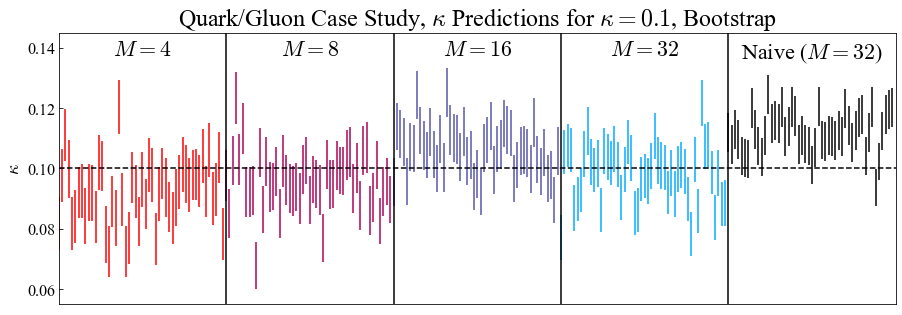

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import norm


strap_pred = torch.load("YOUR_DIR_HERE/bootstrap_pred_arr.pt")
strap_true = torch.load("YOUR_DIR_HERE/bootstrap_true_arr.pt")
strap_unc = torch.load("YOUR_DIR_HERE/bootstrap_unc_arr.pt")

base_pred = torch.load("YOUR_DIR_HERE/baseline_pred_arr.pt")
base_true = torch.load("YOUR_DIR_HERE/baseline_true_arr.pt")
base_unc = torch.load("YOUR_DIR_HERE/baseline_unc_arr.pt")

num_samps = 50
y_arr = torch.arange(0,num_samps*5,1)
true_arr = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
mpl.rc('font',family='Times New Roman')
mpl.rc('mathtext', fontset='cm')

subnet_arr = [4, 8, 16, 32]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
j = 3
colors = ['#ff0000', '#aa0055', '#5555aa', '#00aaff']
for i in range(0,4):
    ax.errorbar(y_arr[i*num_samps:(i+1)*num_samps], strap_pred[i,0,:num_samps,j], yerr = strap_unc[i,0,:num_samps,j], linestyle="None", color=colors[i], alpha=1.0,label=f"M={subnet_arr[i]}")
ax.errorbar(y_arr[4*num_samps:5*num_samps], base_pred[-1,0,:num_samps,j], yerr = base_unc[-1,0,:num_samps,j], linestyle="None", color='k', alpha=1.0, label='Baseline')
ax.axhline(true_arr[j], color='k', linestyle='--', alpha=1.0)
ax.axvline(num_samps, color='k', linestyle='-')
ax.axvline(2*num_samps, color='k', linestyle='-')
ax.axvline(3*num_samps, color='k', linestyle='-')
ax.axvline(4*num_samps, color='k', linestyle='-')
ax.set_xlim(0, 5*num_samps)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylim(0.055, 0.145)
ax.tick_params(axis='y', which='both', direction = 'in', labelsize = 16)
ax.set_ylabel(f'$\kappa$', fontsize=18)
ax.set_title(r'Quark/Gluon Case Study, $\kappa$ Predictions for $\kappa=0.1$, Bootstrap', fontsize=24)
ax.text(0.9, 0.97, f'Naive ($M=32$)', fontsize=22, ha='center', va='top', transform=ax.transAxes)
ax.text(0.1, 0.97, f'$M=4$', fontsize=22, ha='center', va='top', transform=ax.transAxes)
ax.text(0.3, 0.97, f'$M=8$', fontsize=22, ha='center', va='top', transform=ax.transAxes)
ax.text(0.5, 0.97, f'$M=16$', fontsize=22, ha='center', va='top', transform=ax.transAxes)
ax.text(0.7, 0.97, f'$M=32$', fontsize=22, ha='center', va='top', transform=ax.transAxes)
plt.savefig("fig5.pdf", bbox_inches='tight')

# Fig 6

/var/folders/ww/3sjztwms3yxdfdh5qx5sy8pc0000gn/T/ipykernel_65811/4067253153.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


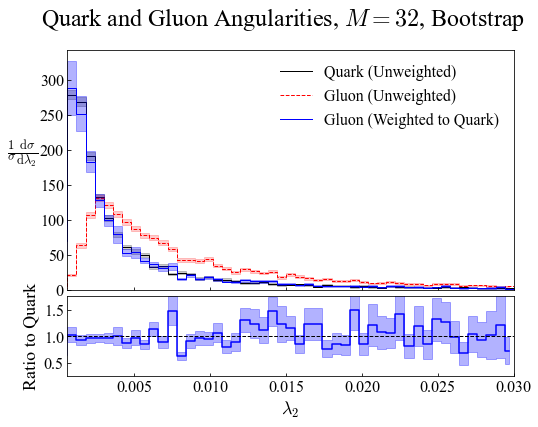

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

gluon_inps = torch.load("YOUR_DIR_HERE/gluon_inputs.pt", map_location=torch.device('cpu'))
quark_inps = torch.load("YOUR_DIR_HERE/quark_inputs.pt", map_location=torch.device('cpu'))
gluon_outs = torch.load("YOUR_DIR_HERE/gluon_outputs.pt", map_location=torch.device('cpu'))
quark_outs = torch.load("YOUR_DIR_HERE/quark_outputs.pt", map_location=torch.device('cpu'))
w0 = torch.load('YOUR_DIR_HERE/w0.pt', map_location=torch.device('cpu'))
cov_mat = torch.load('YOUR_DIR_HERE/cov_mat.pt', map_location=torch.device('cpu'))

mpl.rc('font',family='Times New Roman')
mpl.rc('mathtext', fontset='cm')
feature_range = (0, 0.03)
bins = 50
num_samps = 3000 # Number of toy weight samples
epsilon = 1e-9 # Small number to avoid division by zero

quark_features = (quark_inps[:,:,0]*(quark_inps[:,:,1]**2 + quark_inps[:,:,2]**2)).sum(1).numpy()
gluon_features = (gluon_inps[:,:,0]*(gluon_inps[:,:,1]**2 + gluon_inps[:,:,2]**2)).sum(1).numpy()

toy_weight_vectors = torch.distributions.multivariate_normal.MultivariateNormal(loc = w0, covariance_matrix = cov_mat).sample((num_samps,))
toy_weights_all = torch.exp(gluon_outs @ toy_weight_vectors.T).detach().T.numpy()

bin_edges = np.linspace(feature_range[0], feature_range[1], bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = np.diff(bin_edges)

quark_counts, _ = np.histogram(quark_features, bins=bin_edges)
quark_counts_err = np.sqrt(quark_counts)

total_quarks = quark_counts.sum()
quark_norm_factor = total_quarks * bin_widths
quark_hist = quark_counts / quark_norm_factor
quark_hist_err_poisson = quark_counts_err / quark_norm_factor

gluon_counts_unweighted, _ = np.histogram(gluon_features, bins=bin_edges)
gluon_counts_unweighted_err = np.sqrt(gluon_counts_unweighted)
total_gluons_unweighted = gluon_counts_unweighted.sum()
gluon_unweighted_norm_factor = total_gluons_unweighted * bin_widths
gluon_hist_unweighted = gluon_counts_unweighted / gluon_unweighted_norm_factor
gluon_hist_unweighted_err_poisson = gluon_counts_unweighted_err / gluon_unweighted_norm_factor

toy_gluon_hists_sw = []
toy_gluon_hists_sw2 = []
toy_gluon_hists_density = []
toy_total_weights = []

for i in range(num_samps):
    weights = toy_weights_all[i]
    total_w = weights.sum()
    toy_total_weights.append(total_w)

    hist_sw, _ = np.histogram(gluon_features, bins=bin_edges, weights=weights)
    hist_sw2, _ = np.histogram(gluon_features, bins=bin_edges, weights=weights**2)

    toy_gluon_hists_sw.append(hist_sw)
    toy_gluon_hists_sw2.append(hist_sw2)

    norm_factor = total_w * bin_widths
    hist_density = hist_sw / norm_factor
    toy_gluon_hists_density.append(hist_density)

toy_gluon_hists_sw = np.array(toy_gluon_hists_sw)
toy_gluon_hists_sw2 = np.array(toy_gluon_hists_sw2)
toy_gluon_hists_density = np.array(toy_gluon_hists_density)
toy_total_weights = np.array(toy_total_weights)

mean_gluon_sw = np.mean(toy_gluon_hists_sw, axis=0)
std_gluon_sw = np.std(toy_gluon_hists_sw, axis=0)

mean_gluon_sw2 = np.mean(toy_gluon_hists_sw2, axis=0)
mean_total_weight = np.mean(toy_total_weights)

mean_gluon_norm_factor = mean_total_weight * bin_widths
mean_gluon_hist_weighted = mean_gluon_sw/mean_gluon_norm_factor
std_gluon_hist_weighted = std_gluon_sw/mean_gluon_norm_factor # uncertainty from w0
gluon_hist_err_poisson = np.sqrt(mean_gluon_sw2)/mean_gluon_norm_factor # uncertainty from Poisson stats
total_std_gluon_hist_weighted = np.sqrt(std_gluon_hist_weighted**2 + gluon_hist_err_poisson**2)

toy_ratios = []
for i in range(num_samps):
    ratio = toy_gluon_hists_density[i]/quark_hist
    toy_ratios.append(ratio)

toy_ratios = np.array(toy_ratios)
mean_ratio = np.mean(toy_ratios, axis=0)
std_ratio_weights = np.std(toy_ratios, axis=0) # Uncertainty on ratio from weights ONLY

# error propagation to ratio
total_std_ratio = mean_ratio*np.sqrt(total_std_gluon_hist_weighted**2/mean_gluon_hist_weighted**2+quark_hist_err_poisson**2/quark_hist**2)
fig, axs = plt.subplots(2,1, figsize=(8,6), sharex=True, gridspec_kw={'hspace': 0.04, 'height_ratios': [3, 1]})

ax0 = axs[0]
ax0.stairs(quark_hist, bin_edges, label='Quark (Unweighted)', color='black', baseline=None)
ax0.fill_between(
    bin_centers,
    quark_hist - quark_hist_err_poisson, 
    quark_hist + quark_hist_err_poisson,
    color='black', alpha=0.2, step='mid'
)
ax0.stairs(gluon_hist_unweighted, bin_edges, label='Gluon (Unweighted)', color='red', linestyle='--', baseline=None)
ax0.fill_between(
    bin_centers,
    gluon_hist_unweighted - gluon_hist_unweighted_err_poisson, 
    gluon_hist_unweighted + gluon_hist_unweighted_err_poisson,
    color='red', alpha=0.2, step='mid'
)
ax0.stairs(mean_gluon_hist_weighted, bin_edges, label='Gluon (Weighted to Quark)', color='blue', baseline=None)
ax0.fill_between(
    bin_centers,
    mean_gluon_hist_weighted - total_std_gluon_hist_weighted,
    mean_gluon_hist_weighted + total_std_gluon_hist_weighted,
    color='blue', alpha=0.3, step='mid'
)
ax0.set_ylabel(r'$\frac{1}{\sigma} \frac{\rm{d} \sigma}{\rm{d} \lambda_2}$', fontsize=18, rotation=0)
ax0.yaxis.set_label_coords(-0.1, 0.5)
ax0.set_ylim(bottom=0)
ax0.legend(frameon=False, fontsize=16)
ax0.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
ax1 = axs[1]

ax1.step(bin_centers, mean_ratio, where='mid', color='blue', label='Mean Ratio')
ax1.fill_between(
    bin_centers,
    mean_ratio - total_std_ratio,
    mean_ratio + total_std_ratio,
    color='blue', alpha=0.3, step='mid'
)


ax1.axhline(1.0, color='black', linestyle='--', linewidth=1)
ax1.set_xlabel(r'$\lambda_2$', fontsize=18)
ax1.set_ylabel('Ratio to Quark', fontsize=18)
ax1.set_ylim(0.25, 1.75) # Adjust ylim if needed based on results
ax1.set_xlim(feature_range[0]+(feature_range[1]-feature_range[0])/bins, feature_range[1])

ax0.tick_params(axis='both', direction='in', labelsize=16)
ax1.tick_params(axis='both', direction='in', labelsize=16)

plt.suptitle(f'Quark and Gluon Angularities, $M = 32$, Bootstrap', fontsize=24)
plt.tight_layout()
plt.savefig("fig6.pdf", bbox_inches='tight')